In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.pylab as pl
import matplotlib as mpl
import scipy
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
mpl.rcParams['figure.dpi']=300

plt.rcParams.update({
    "text.usetex": True,
    "font.size" : 16,
    "font.family": "serif",
    "font.serif": 'cm10',
    'savefig.bbox' : 'tight'})

from utils.array import array_pattern,get_lobes_positions

/var/folders/cw/5xff940s6559c90nyhzx9s9m0000gn/T/ipykernel_53606/61741219.py:7: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']


## 5.

Consider the array with spacing d = λ/2 and M = 24. Apply several Kaiser windows to the array. Vary the β value from 0 – 5 in steps of 0.5. How does the −3 dB or −6 dB mainlobe width and the maximum sidelobe level vary with β? Compute and report the white noise gain for each Kaiser window. What is the advantage and disadvantage of using for instant a Kaiser window on the array?

In [2]:
# Number of elements
M=24
# Wavelength
lambda_ = 1#m
# Spacing
spacing = lambda_/2
# Elements positions vector
positions = np.arange(0,M,1)*spacing
# K values vector
k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_
# Beta values vector
beta_vector = np.arange(0.5,5.5,0.5)

In [10]:
SL_max_levels = []
ML_3dB_widths = []
ML_6dB_widths = []
White_noise_gain = []
patterns_kaiser = []

for beta in tqdm(beta_vector) :
    
    window = scipy.signal.windows.kaiser(M=24, beta=beta, sym=True)
    # Noramlized weigths vector
    weights = np.ones(M)*window
    weights = weights/np.sum(weights)
    pattern_kaiser = np.abs(array_pattern(positions,weights,k_values))
    pattern_kaiser = 20*np.log10(pattern_kaiser/np.max(pattern_kaiser))
    patterns_kaiser.append(pattern_kaiser)
    params = get_lobes_positions(pattern_kaiser,np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
                                 
    SL_max_levels.append(params['SL max level'])
    ML_3dB_widths.append(params['ML 3 dB width'])
    ML_6dB_widths.append(params['ML 6 dB width'])
    White_noise_gain.append(np.linalg.norm(weights)**(-2))


100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 68.01it/s]


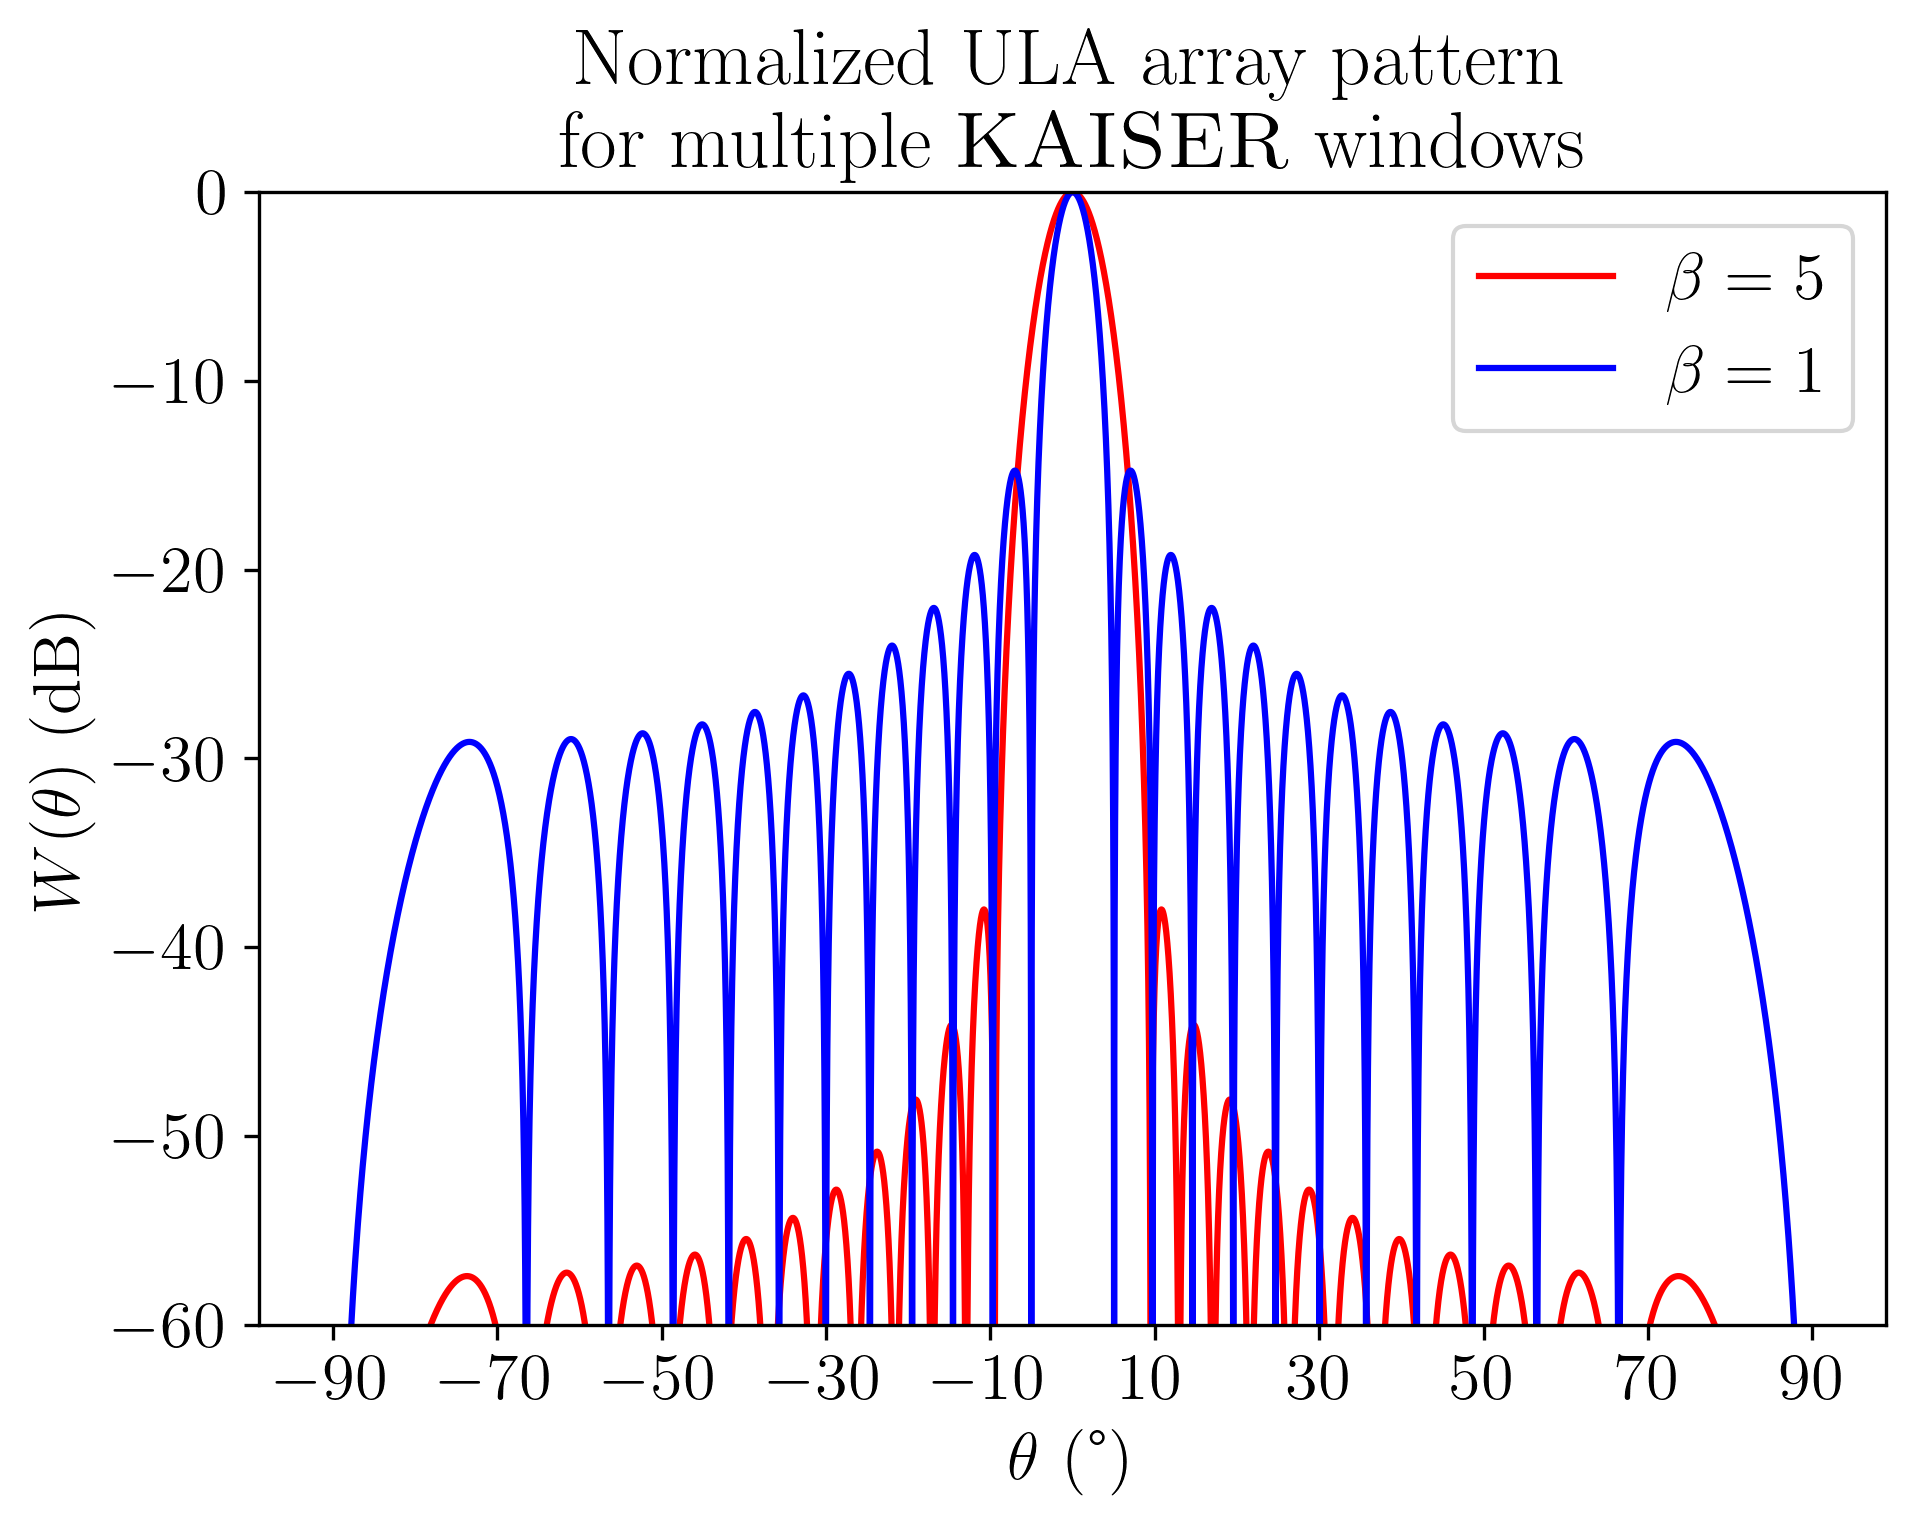

In [20]:
fig,ax = plt.subplots(figsize=(7,5))
ax.set_title('''Normalized ULA array pattern \nfor multiple \\textsc{KAISER} windows''')
ax.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,patterns_kaiser[9],label='$\\beta=5$',color='red')
ax.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,patterns_kaiser[1],label='$\\beta=1$',color='blue')
ax.set_xlabel('$\\theta$ (°)')
ax.set_ylabel('$W(\\theta)$ (dB)')
ax.set_ylim([-60,0])
ax.set_xticks(np.arange(-90,110,20))
ax.legend(loc='best')
plt.savefig('images/array/ula_kaiser_comp.png',dpi=300)

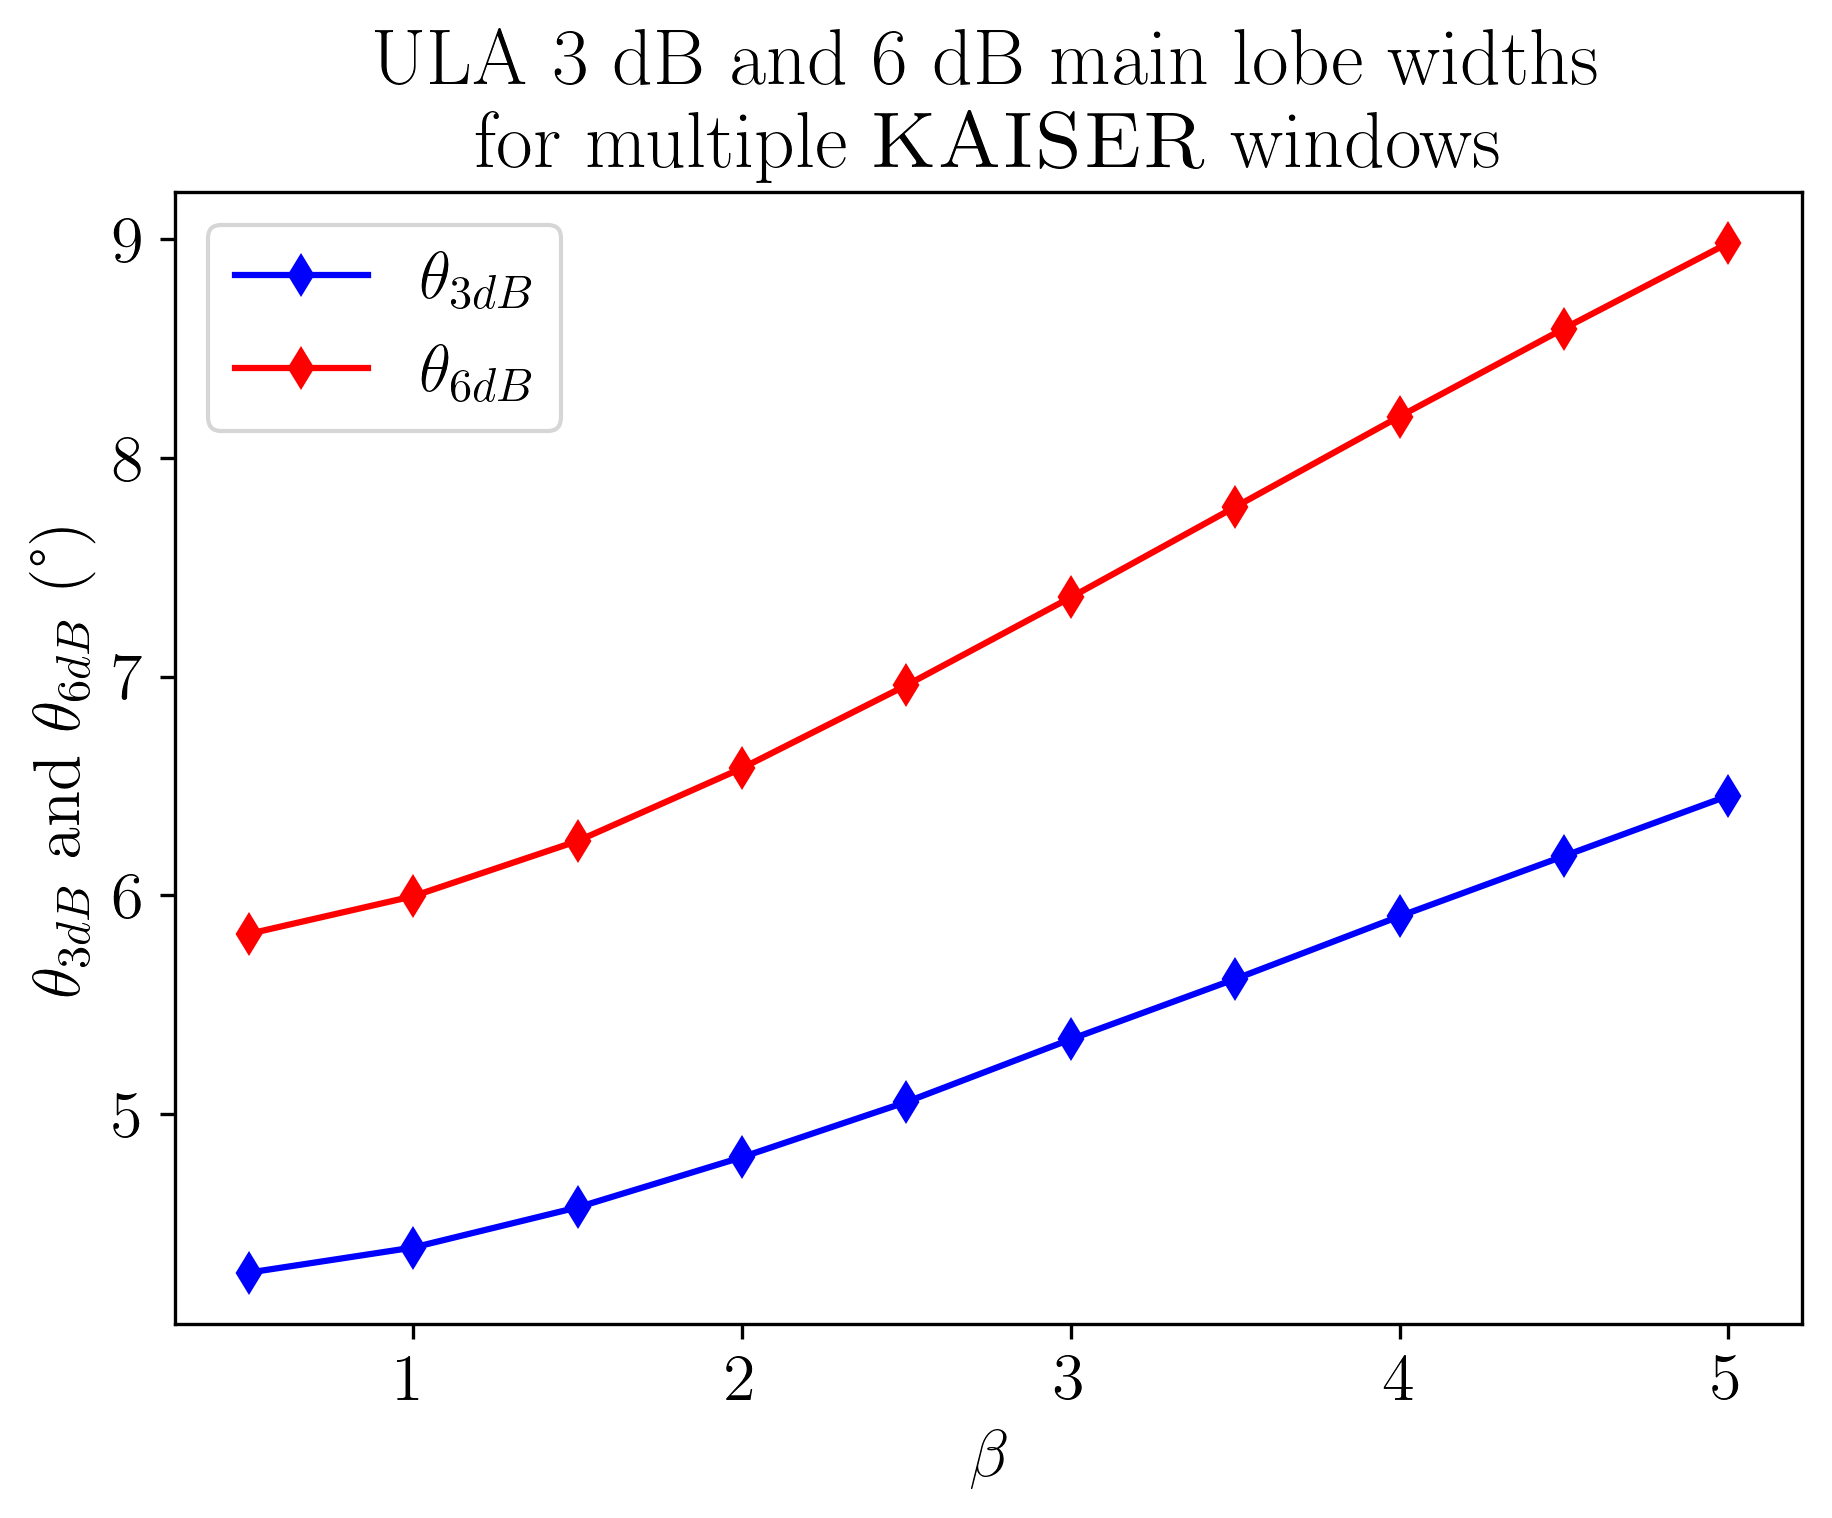

In [18]:
fig,ax = plt.subplots(figsize=(7,5))
ax.plot(beta_vector,ML_3dB_widths,color='blue',label='$\\theta_{3dB}$',marker='d')
ax.plot(beta_vector,ML_6dB_widths,color='red',label='$\\theta_{6dB}$',marker='d')
ax.set_xlabel('$\\beta$')
ax.set_ylabel('$\\theta_{3dB}$ and $\\theta_{6dB}$ (°)')
ax.legend(loc='best')
ax.set_title('''ULA 3 dB and 6 dB main lobe widths 
for multiple \\textsc{KAISER} windows''')
plt.savefig('images/array/ula_kaiser_lobe_widths.png',dpi=300)

[23.99064606850958, 23.86932910589263, 23.467251054848813, 22.727213051048828, 21.744551258673933, 20.669151729580054, 19.616504945214583, 18.645988889543833, 17.776155861023053, 17.004381679453473]


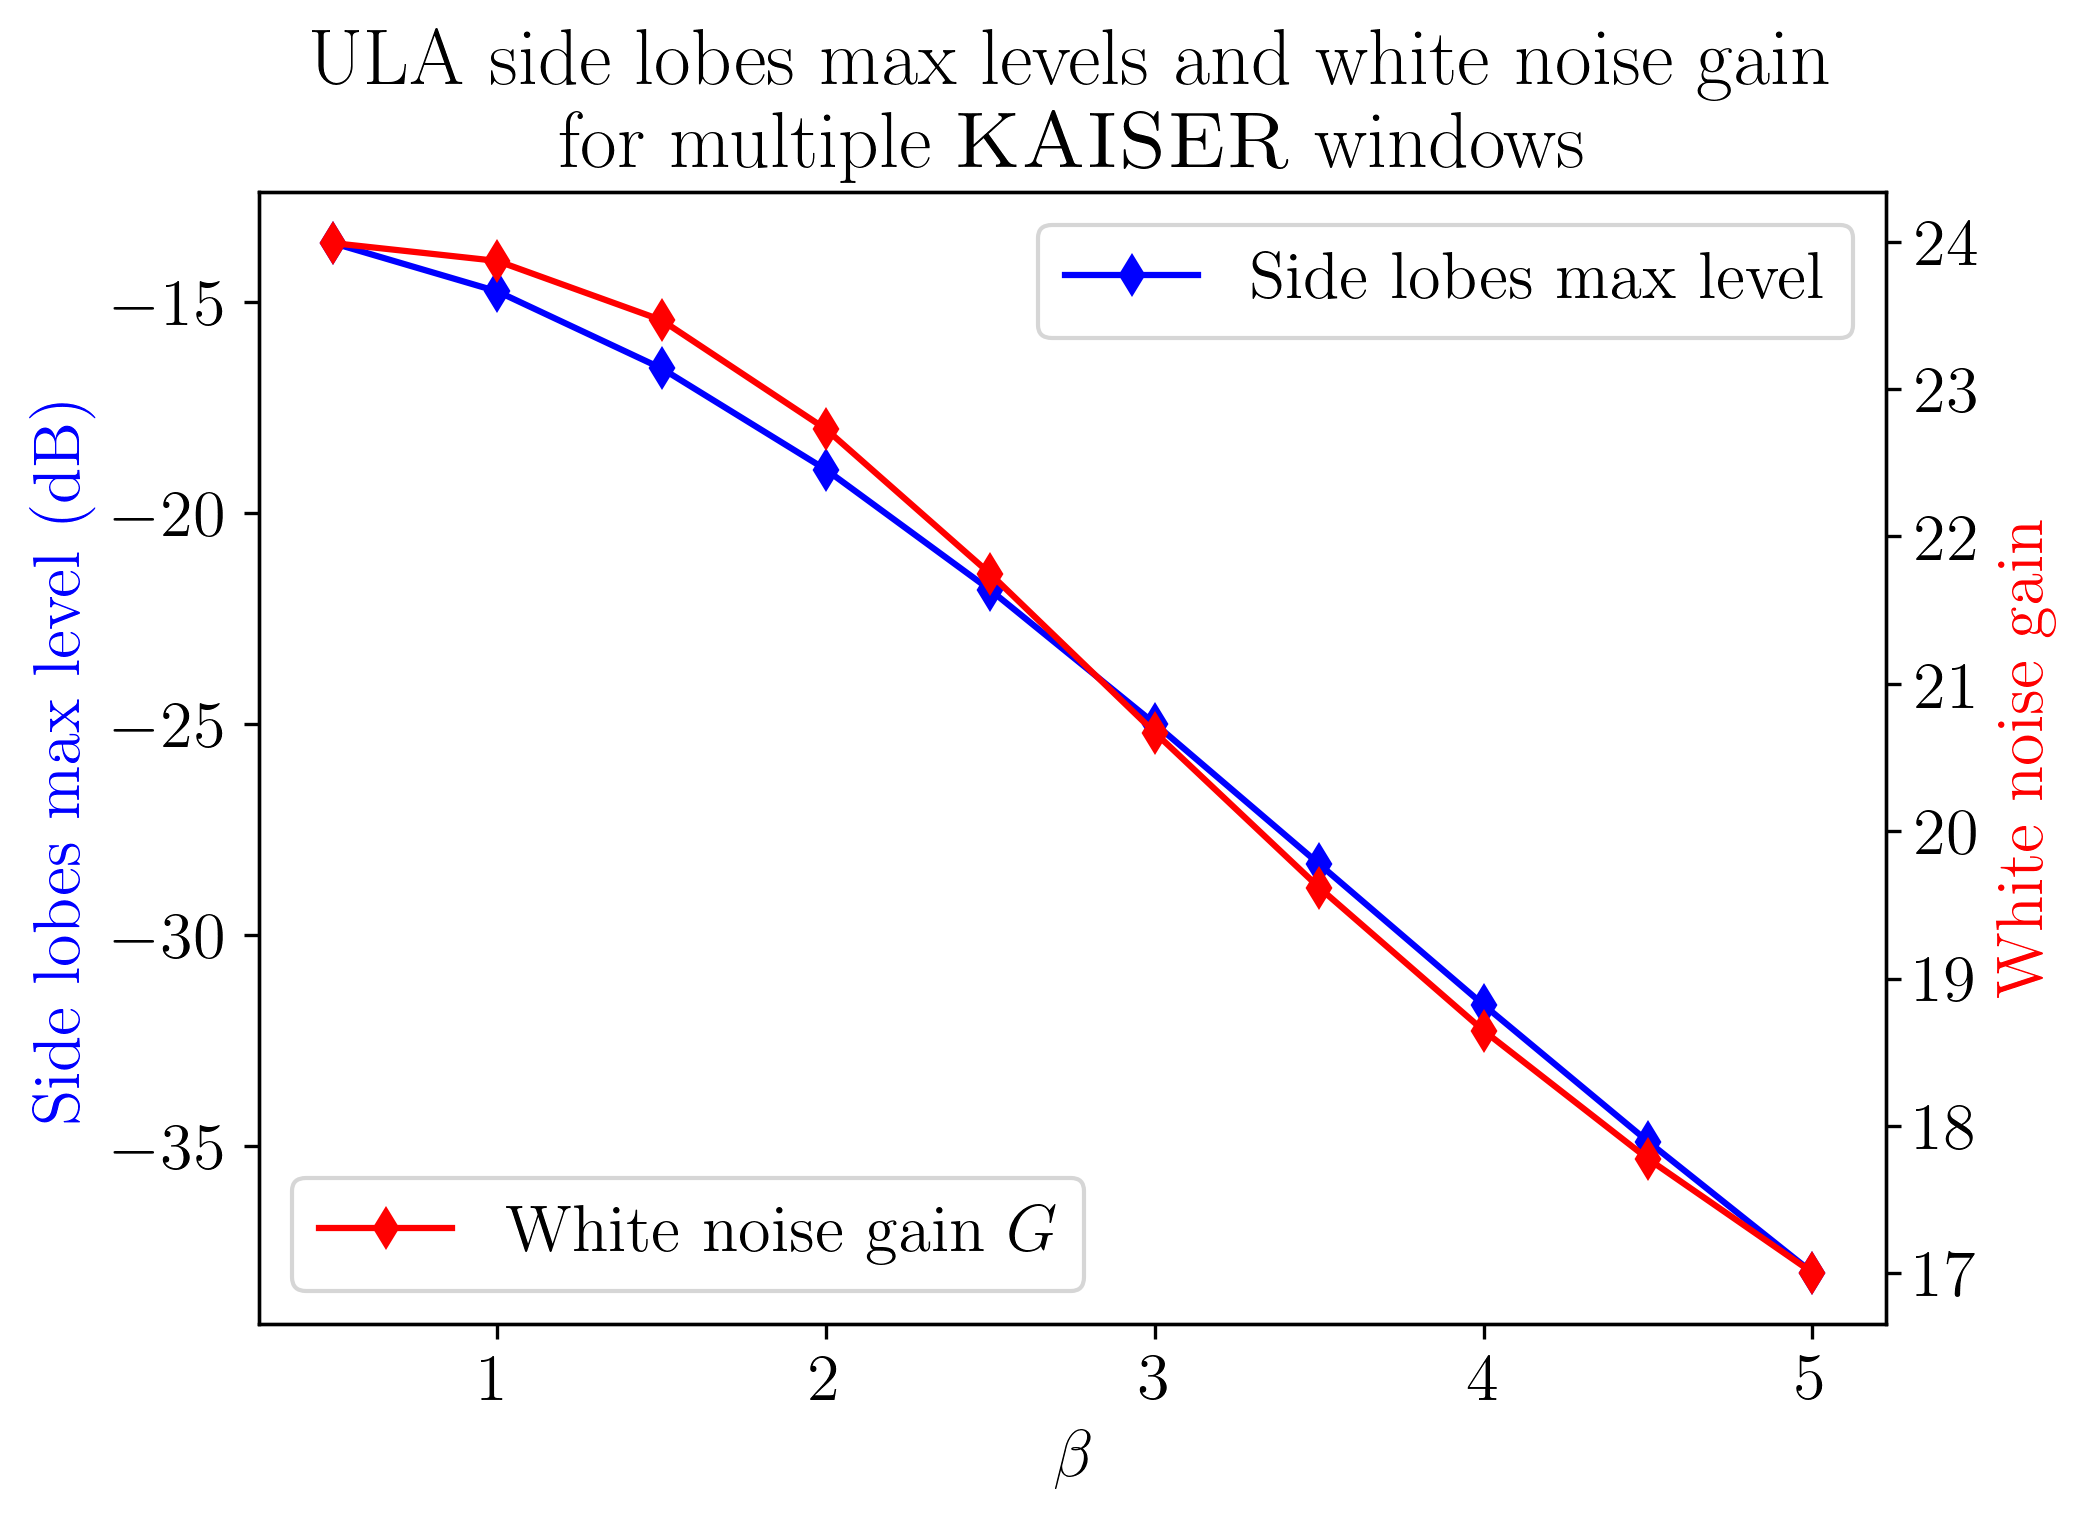

In [13]:
fig, ax1 = plt.subplots(figsize=(7,5))

plt.title('''ULA side lobes max levels and white noise gain 
for multiple \\textsc{KAISER} windows''')
ax2 = ax1.twinx()
ax1.plot(beta_vector,SL_max_levels,color='blue',label='Side lobes max level',marker='d')
ax2.plot(beta_vector,White_noise_gain,color='red',label='White noise gain $G$',marker='d')

ax1.set_xlabel('$\\beta$')
ax1.set_ylabel('Side lobes max level (dB)',color='blue')
ax2.set_ylabel('White noise gain',color='red')
ax1.legend(loc=0)
ax2.legend(loc=3)
plt.savefig('images/array/ula_kaiser_SL_max_white_noise_gain.png',dpi=300)
print(White_noise_gain)

## 6.

Let the array have M = 24 elements with unity weights and let the element spacings be given as in the variable ElPos given below:

% Array "Case B"
n = 1:2:24;
d = 1/2;   % Corresponding to lambda/2
e_n = [-0.017 -0.538 -0.617 -1.0 -1.142 -1.372 -1.487 -1.555 -1.537 -1.3 -0.772 -0.242];
 ElPos = [-fliplr(d_n) d_n];
     

[The element locations have been taken from Hodjat, F., and S. Hovanessian. "Nonuniformly spaced linear and planar array antennas for sidelobe reduction." IEEE Trans. on Antennas and Propagation 26.2 (1978): 198-204.]


Compare the solutions from 1), 2) and 3) with respect to beamwidth, aperture, sidelobes, grating lobes, white noise gain, no. of elements, size of aperture, etc.

In [31]:
M=24
# Wavelength
lambda_ = 1#m
# Spacing
spacing = lambda_/2
# Elements positions vector
positions = np.arange(0,M,1)*spacing
# Weigths vector
weights = np.ones(M)
weights = weights/np.sum(weights)
# K values vector
k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_
# ElPos vector
n = np.arange(1,24,2)
e_n = np.array([-0.017,-0.538,-0.617,-1.0,-1.142,-1.372,-1.487,-1.555,-1.537,-1.3,-0.772,-0.242])
d_n = (e_n + n/2)*spacing
ElPos = np.concatenate((-np.flip(d_n),d_n))


In [32]:
pattern_e = np.abs(array_pattern(ElPos,weights,k_values))
pattern_e = 20*np.log10(pattern_e/np.max(pattern_e))

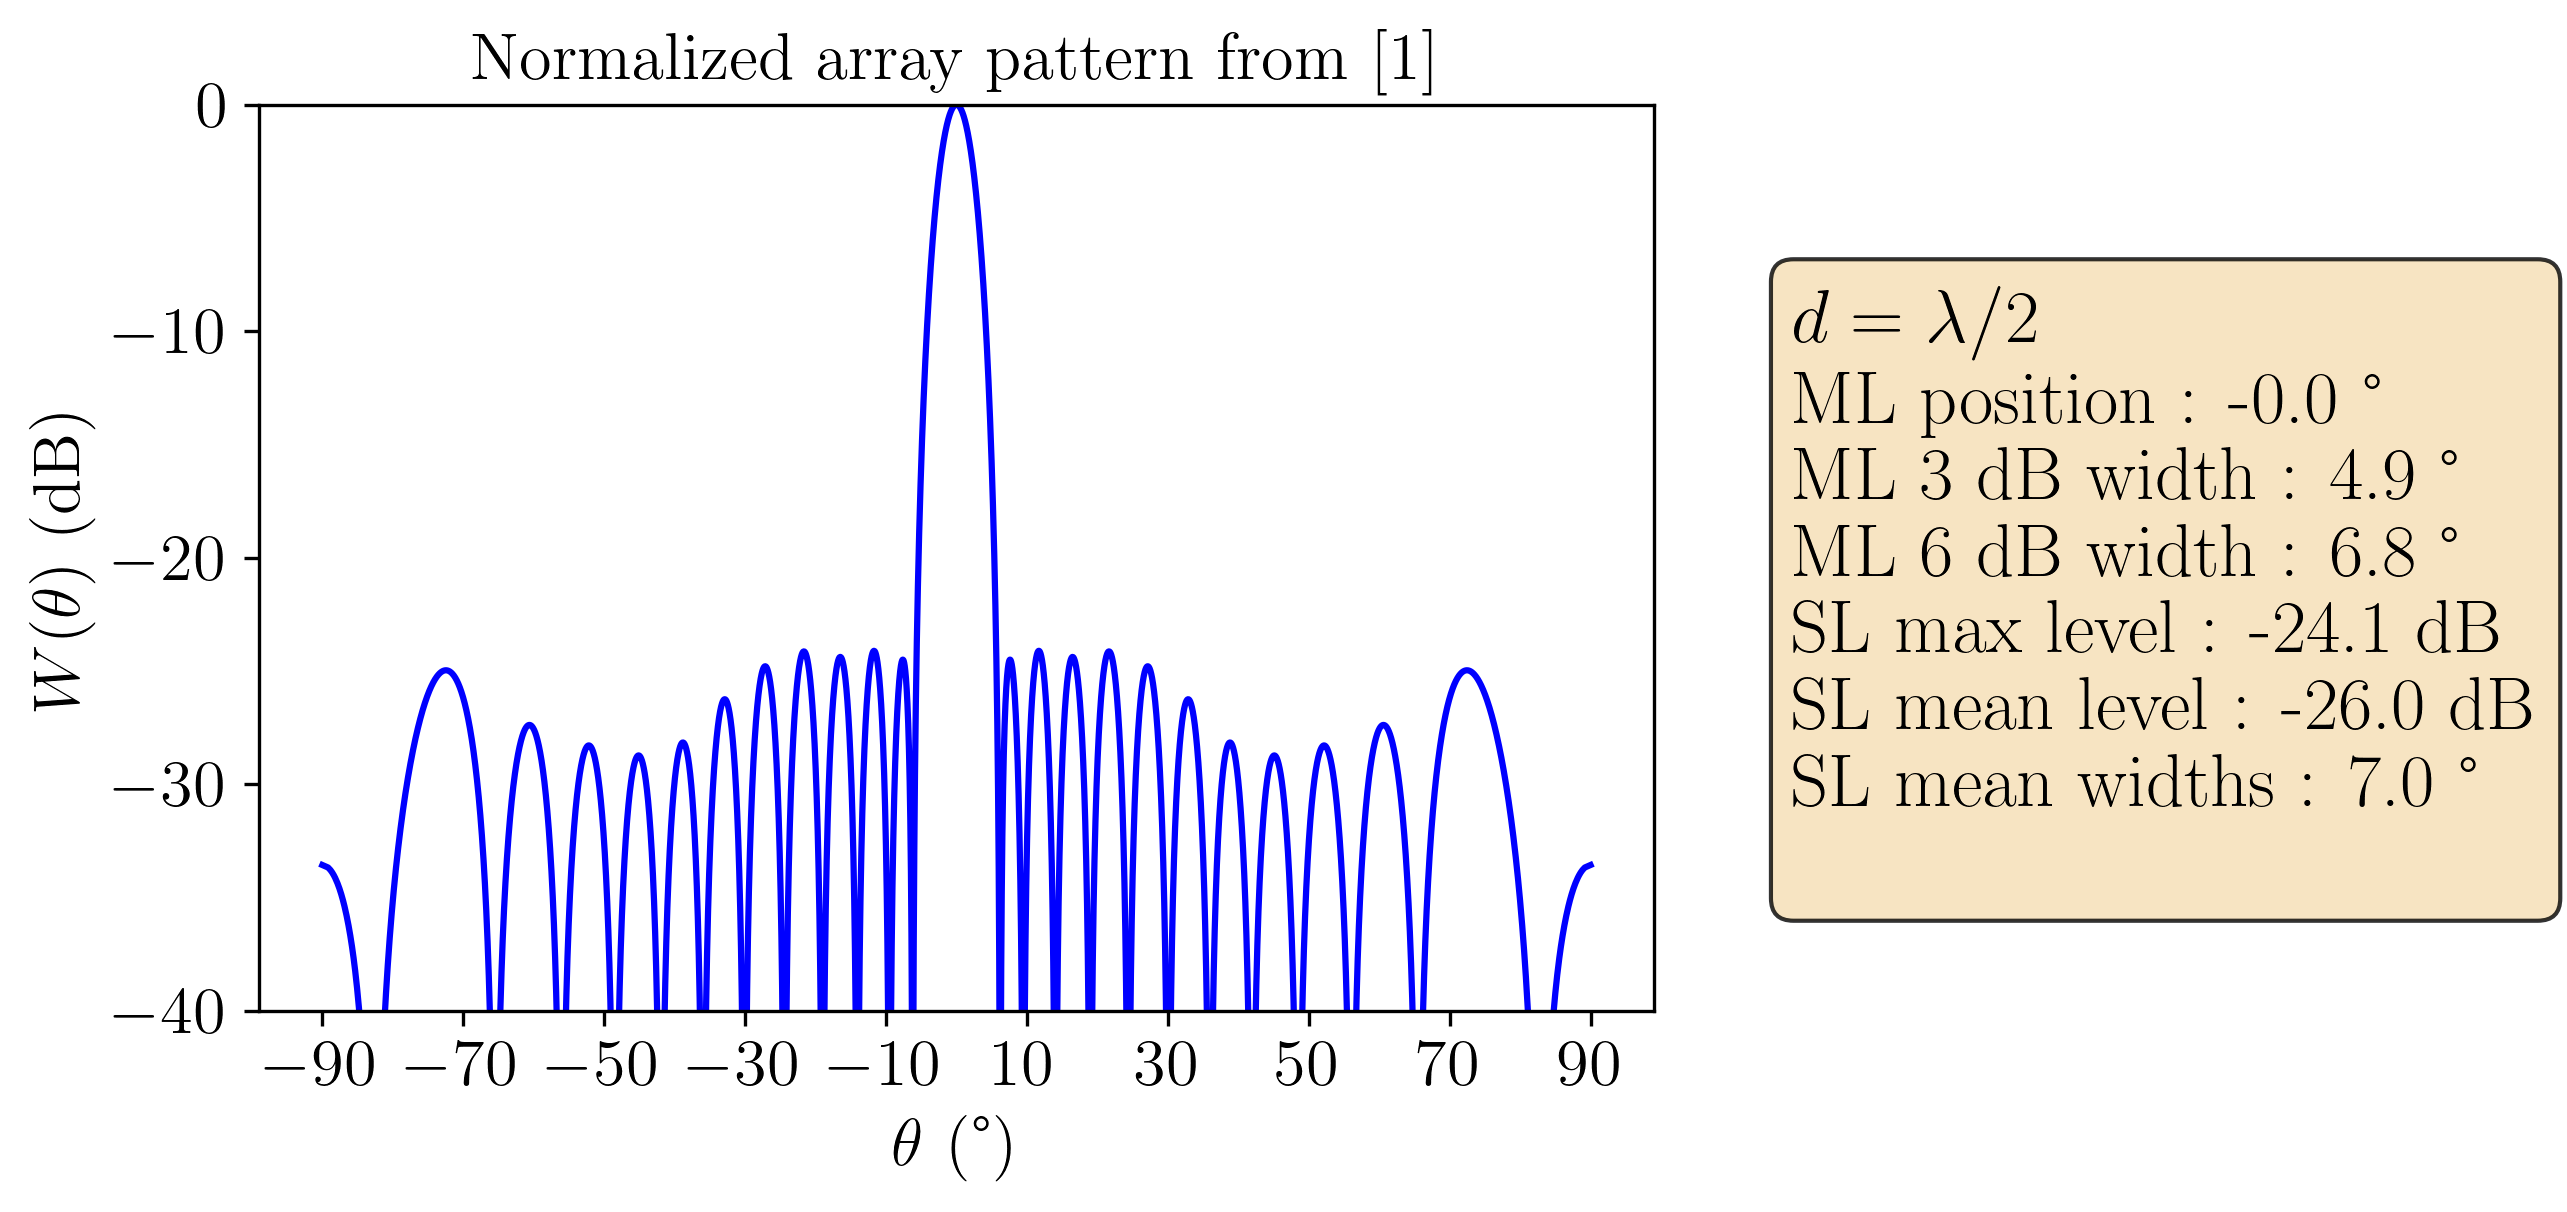

In [33]:
fig,ax1 = plt.subplots(1)


ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,pattern_e,color='blue')

ax1.set_xlabel('$\\theta$ (°)',fontsize=16)
ax1.set_ylabel('$W(\\theta)$ (dB)',fontsize=16)
ax1.set_title('Normalized array pattern from [1]',fontsize=16)
ax1.set_xticks(np.arange(-90,110,20))
params = get_lobes_positions(pattern_e,np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)

textstr = '''$d=\lambda/2$ 
    ML position : {:.1f} °
    ML 3 dB width : {:.1f} °
    ML 6 dB width : {:.1f} °
    SL max level : {:.1f} dB
    SL mean level : {:.1f} dB 
    SL mean widths : {:.1f} °
    '''.format(params['ML position'],params['ML 3 dB width'],params['ML 6 dB width'],params['SL max level'],params['SL mean level'],params['SL mean widths'])
    
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.8, textstr, transform=ax1.transAxes, fontsize=18,verticalalignment='top', bbox=props)

ax1.set_ylim([-40,0])
plt.savefig('images/array/ElPos_array_pattern.png',dpi=300)

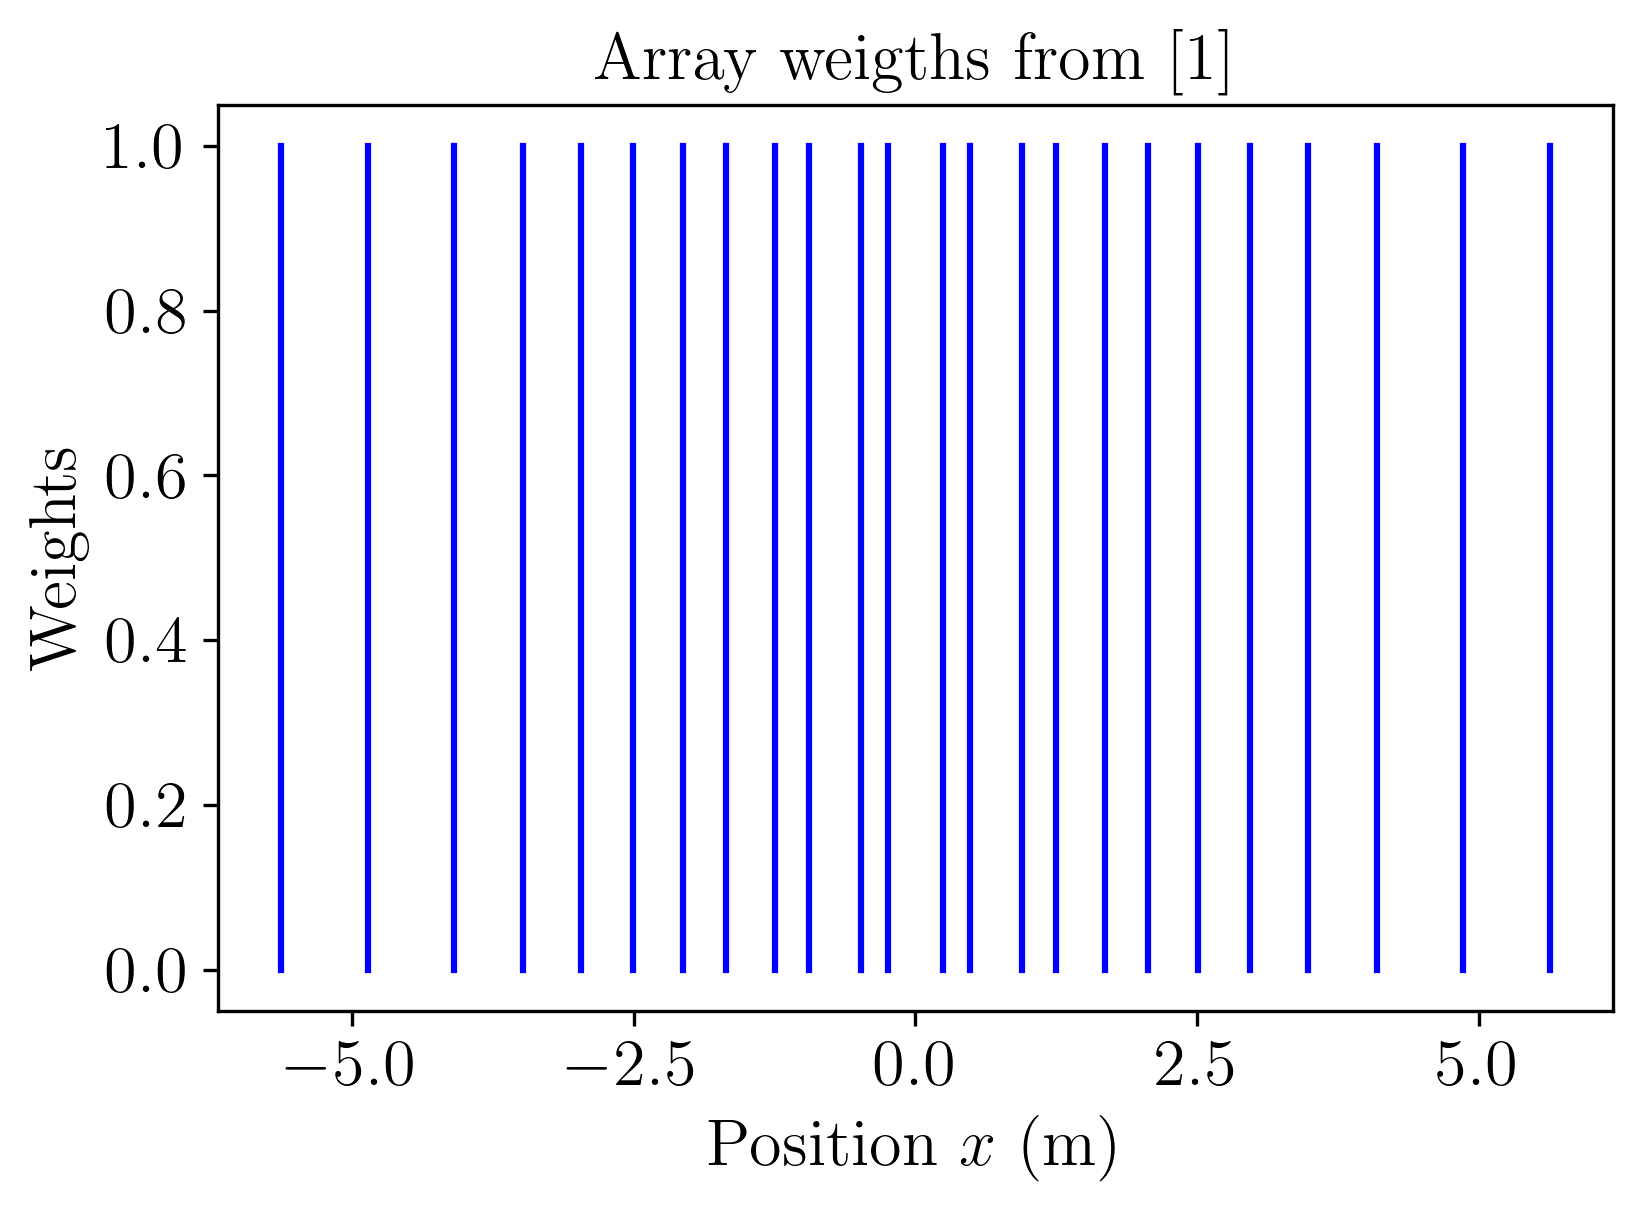

In [34]:
fig,ax1 = plt.subplots(1)


ax1.plot([ElPos,ElPos],[np.zeros(len(ElPos)),np.ones(len(ElPos))],color='blue')

ax1.set_xlabel('Position $x$ (m)',fontsize=16)
ax1.set_ylabel('Weights',fontsize=16)
ax1.set_title('Array weigths from [1]',fontsize=16)

plt.savefig('images/array/ElPos_array_pattern_weights.png',dpi=300)

## 7.

Apply steering to the array in 3) and plot the response. Also plot the unsteered array pattern for sin(angle) ∈ [−2, 2]. Explain the behavior. Does the observed effect/feature also occur for the other arrays you have tested?



In [35]:
# Steering angle : 60°

steering_angle = np.pi/3

extended_k_values = np.arange(-2,2+0.0001,0.0001)*2*np.pi/lambda_
pattern_extended = np.abs(array_pattern(ElPos,weights,extended_k_values))
pattern_extended = 20*np.log10(pattern_extended/np.max(pattern_extended))

k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_
steered_pattern = np.abs(array_pattern(ElPos,weights,k_values-np.sin(steering_angle)*2*np.pi/lambda_))
steered_pattern = 20*np.log10(steered_pattern/np.max(steered_pattern))


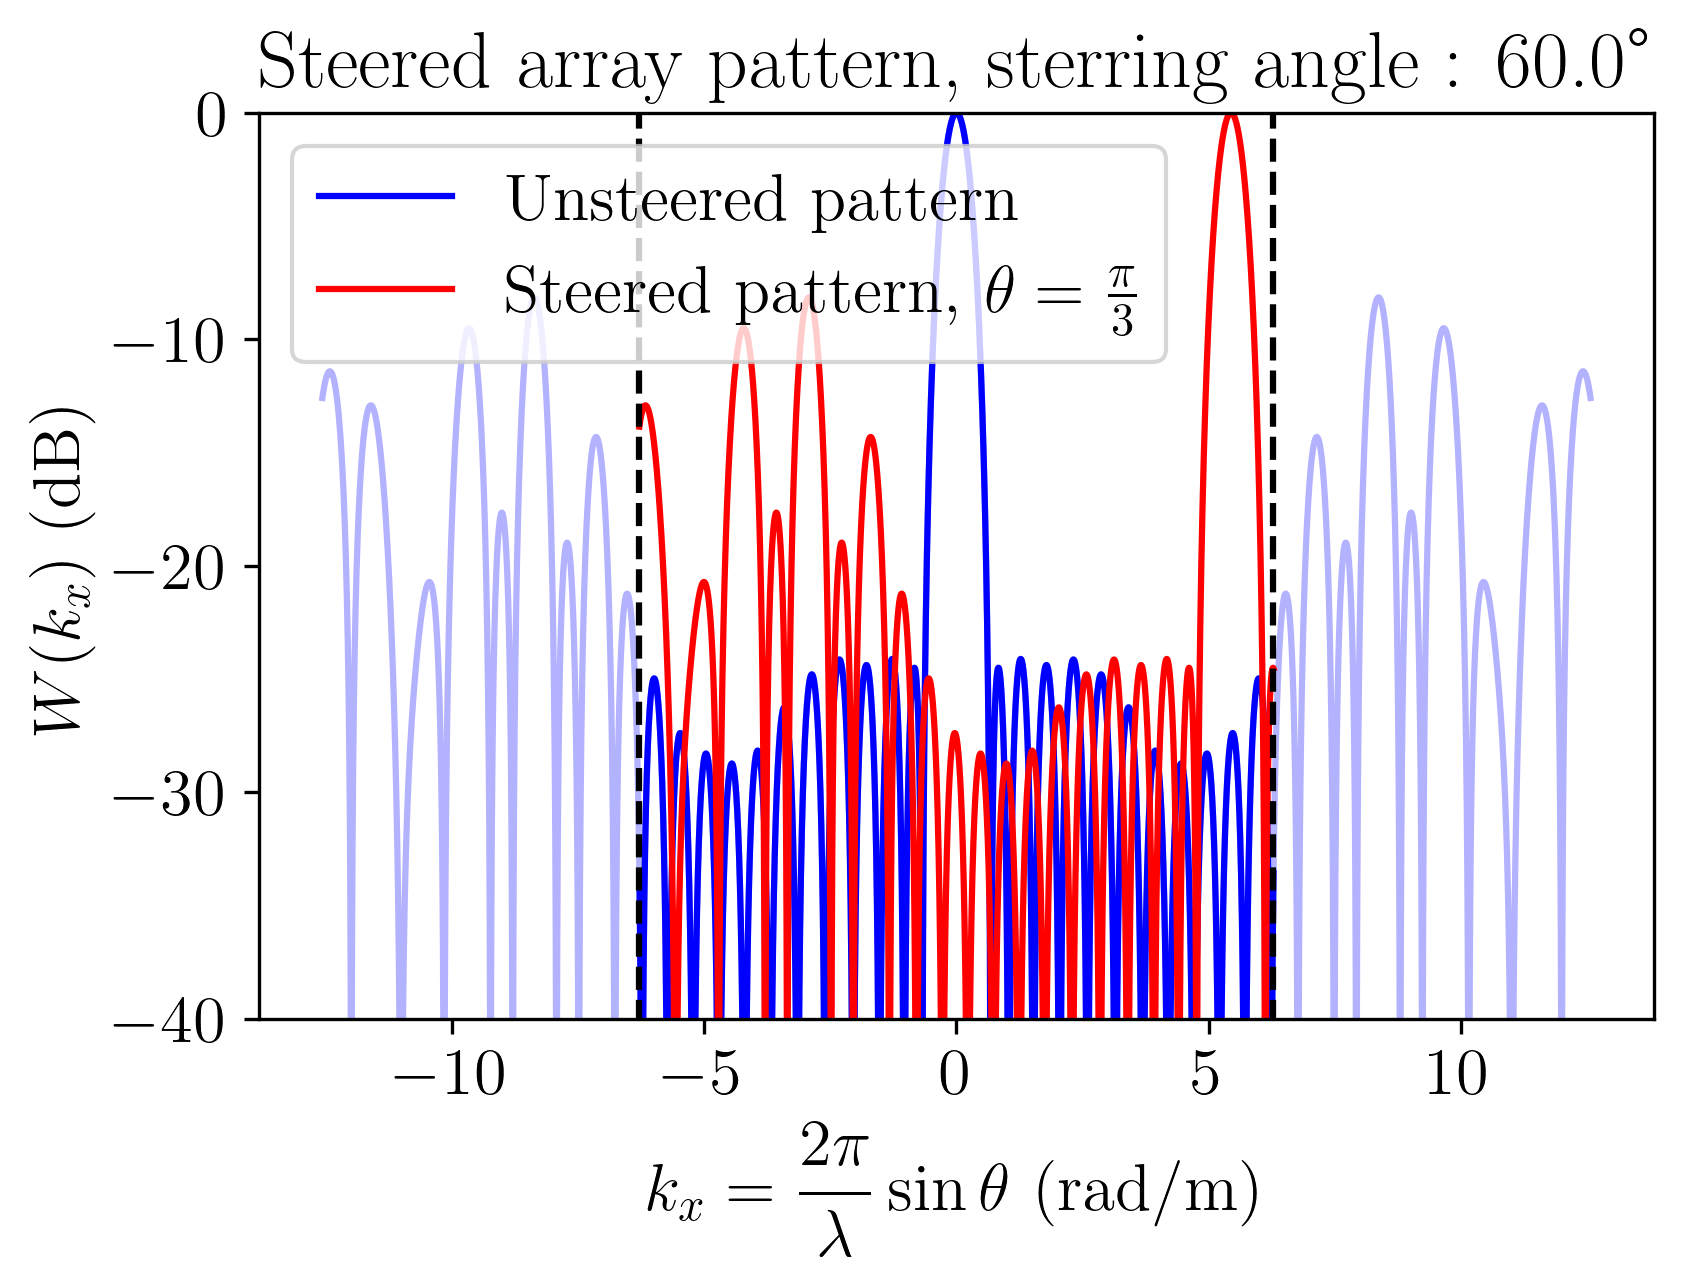

In [36]:
fig,ax1 = plt.subplots(1)

ax1.plot(extended_k_values,pattern_extended,color='blue',alpha=0.3)
ax1.plot(extended_k_values[np.abs(extended_k_values) < 2*np.pi/lambda_],pattern_extended[np.abs(extended_k_values) < 2*np.pi/lambda_],color='blue',label='Unsteered pattern')
ax1.plot(k_values,steered_pattern,color='red',label='Steered pattern, $\\theta=\\frac{\pi}{3}$')

ax1.set_xlabel('$k_x=\dfrac{2\pi}{\lambda}\sin\\theta$ (rad/m)',fontsize=16)
ax1.set_ylabel('$W(k_x)$ (dB)',fontsize=16)
ax1.set_title('ElPos array pattern',fontsize=16)
ax1.plot([-2*np.pi/lambda_,-2*np.pi/lambda_],[np.min(pattern_extended),np.max(pattern_extended)],linestyle='--',color='k')
ax1.plot([2*np.pi/lambda_,2*np.pi/lambda_],[np.min(pattern_extended),np.max(pattern_extended)],linestyle='--',color='k')
ax1.legend(loc='best')
ax1.set_ylim([-40,0])

ax1.set_title('Steered array pattern, sterring angle : {:.1f}°'.format(steering_angle*180/np.pi))

plt.savefig('images/array/steered_array_pattern_elPos.png',dpi=300)



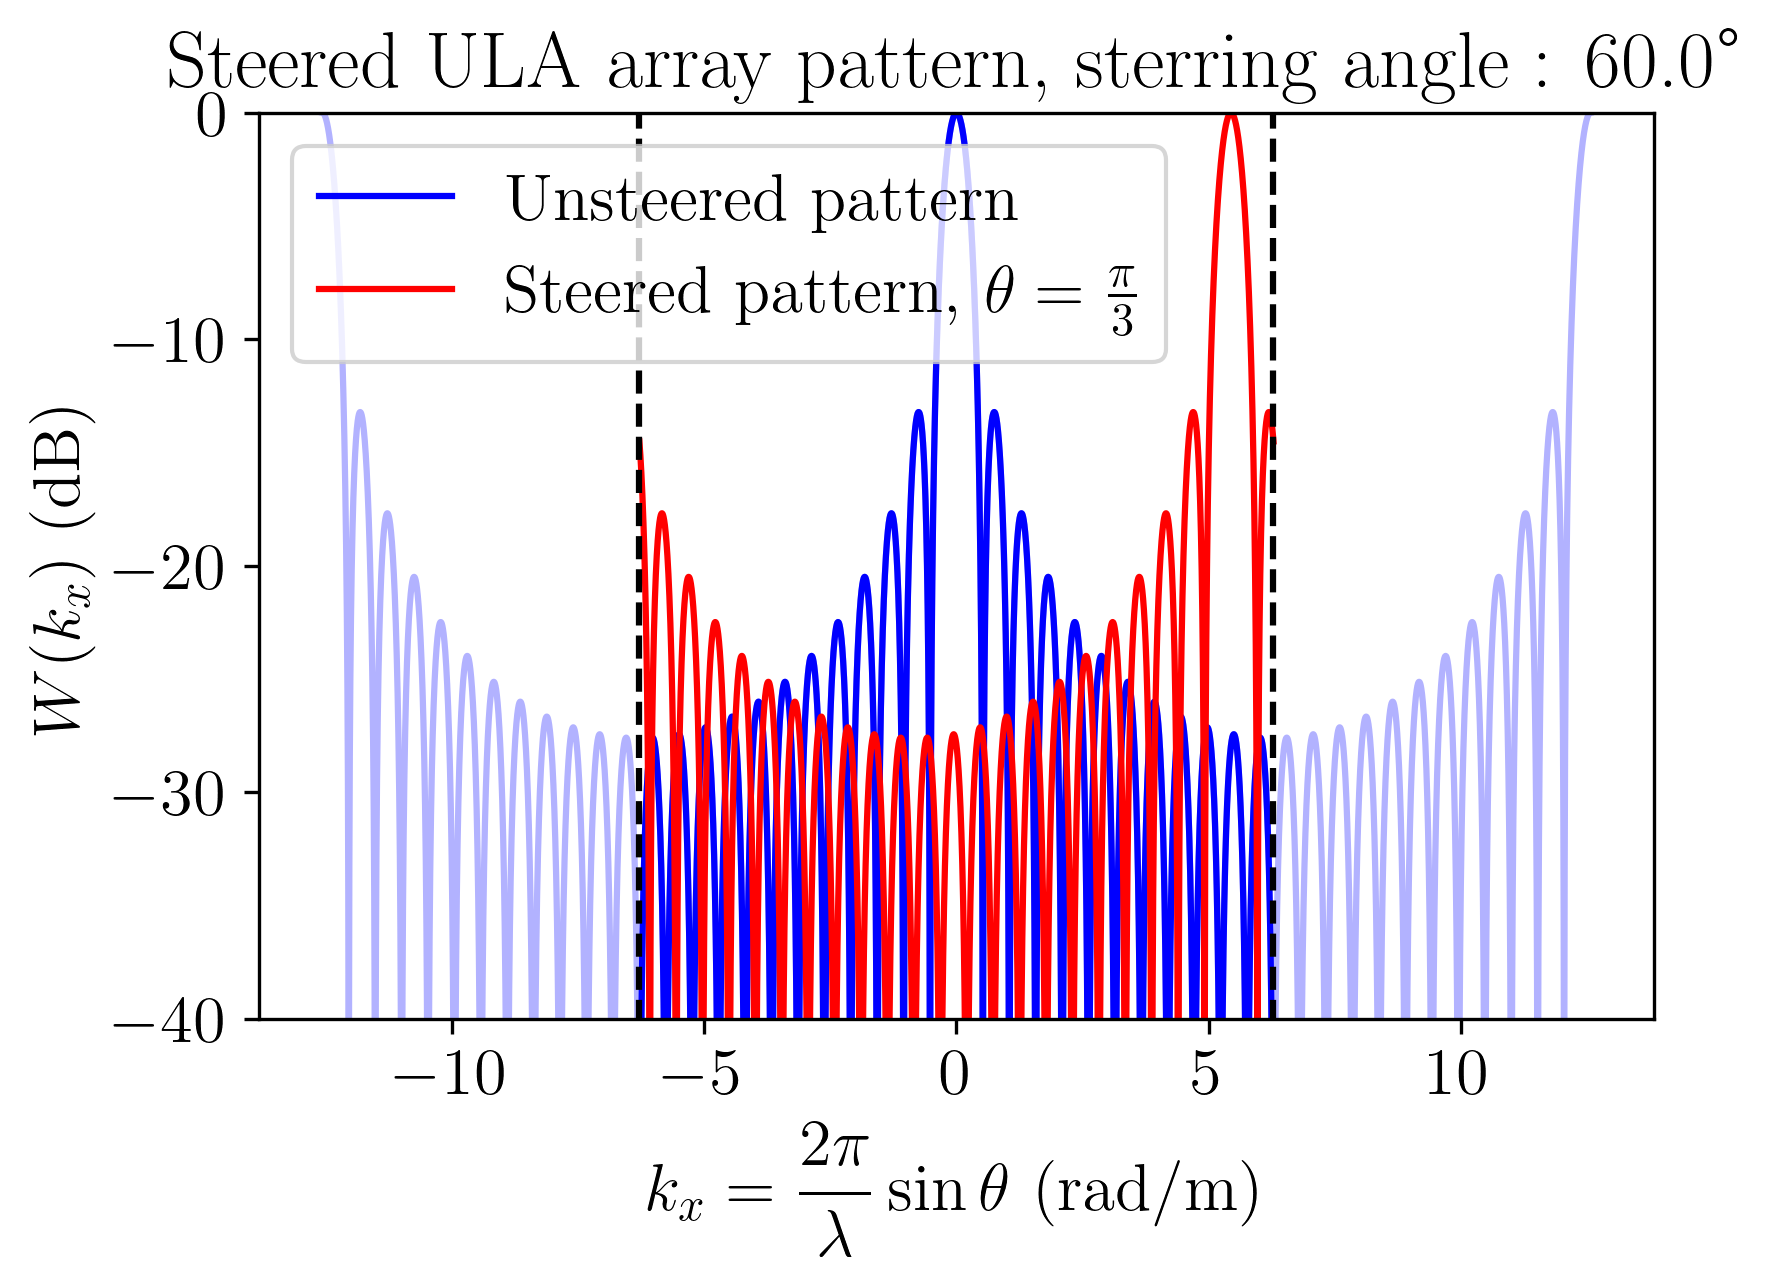

In [37]:
#Assume a linear array with M = 24 elements with unity weight. 
#Let the elements be uniformly spaced and try four different element spacings: d = λ/4, λ/2, λ, and 2λ. 
#Plot the results and discuss the differences as the inter-element distance varies.

# Number of elements
M=24
# Wavelength
lambda_ = 1#m
# Spacing
spacing = lambda_/2
# Elements positions vector
positions = np.arange(0,M,1)*spacing
# Weigths vector
weights = np.ones(M)
# K values vector
k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_
# Array pattern 

# Steering angle : 60°

steering_angle = np.pi/3

extended_k_values = np.arange(-2,2+0.0001,0.0001)*2*np.pi/lambda_
pattern_extended = np.abs(array_pattern(positions,weights,extended_k_values))
pattern_extended = 20*np.log10(pattern_extended/np.max(pattern_extended))

k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_
steered_pattern = np.abs(array_pattern(positions,weights,k_values-np.sin(steering_angle)*2*np.pi/lambda_))
steered_pattern = 20*np.log10(steered_pattern/np.max(steered_pattern))


fig,ax1 = plt.subplots(1)

ax1.plot(extended_k_values,pattern_extended,color='blue',alpha=0.3)
ax1.plot(extended_k_values[np.abs(extended_k_values) < 2*np.pi/lambda_],pattern_extended[np.abs(extended_k_values) < 2*np.pi/lambda_],color='blue',label='Unsteered pattern')
ax1.plot(k_values,steered_pattern,color='red',label='Steered pattern, $\\theta=\\frac{\pi}{3}$')

ax1.set_xlabel('$k_x=\dfrac{2\pi}{\lambda}\sin\\theta$ (rad/m)',fontsize=16)
ax1.set_ylabel('$W(k_x)$ (dB)',fontsize=16)
ax1.set_title('ElPos array pattern',fontsize=16)
ax1.plot([-2*np.pi/lambda_,-2*np.pi/lambda_],[np.min(pattern_extended),np.max(pattern_extended)],linestyle='--',color='k')
ax1.plot([2*np.pi/lambda_,2*np.pi/lambda_],[np.min(pattern_extended),np.max(pattern_extended)],linestyle='--',color='k')
ax1.legend(loc='best')
ax1.set_ylim([-40,0])
ax1.set_title('Steered ULA array pattern, sterring angle : {:.1f}°'.format(steering_angle*180/np.pi))

plt.savefig('images/array/steered_ULA_array_pattern.png',dpi=300)




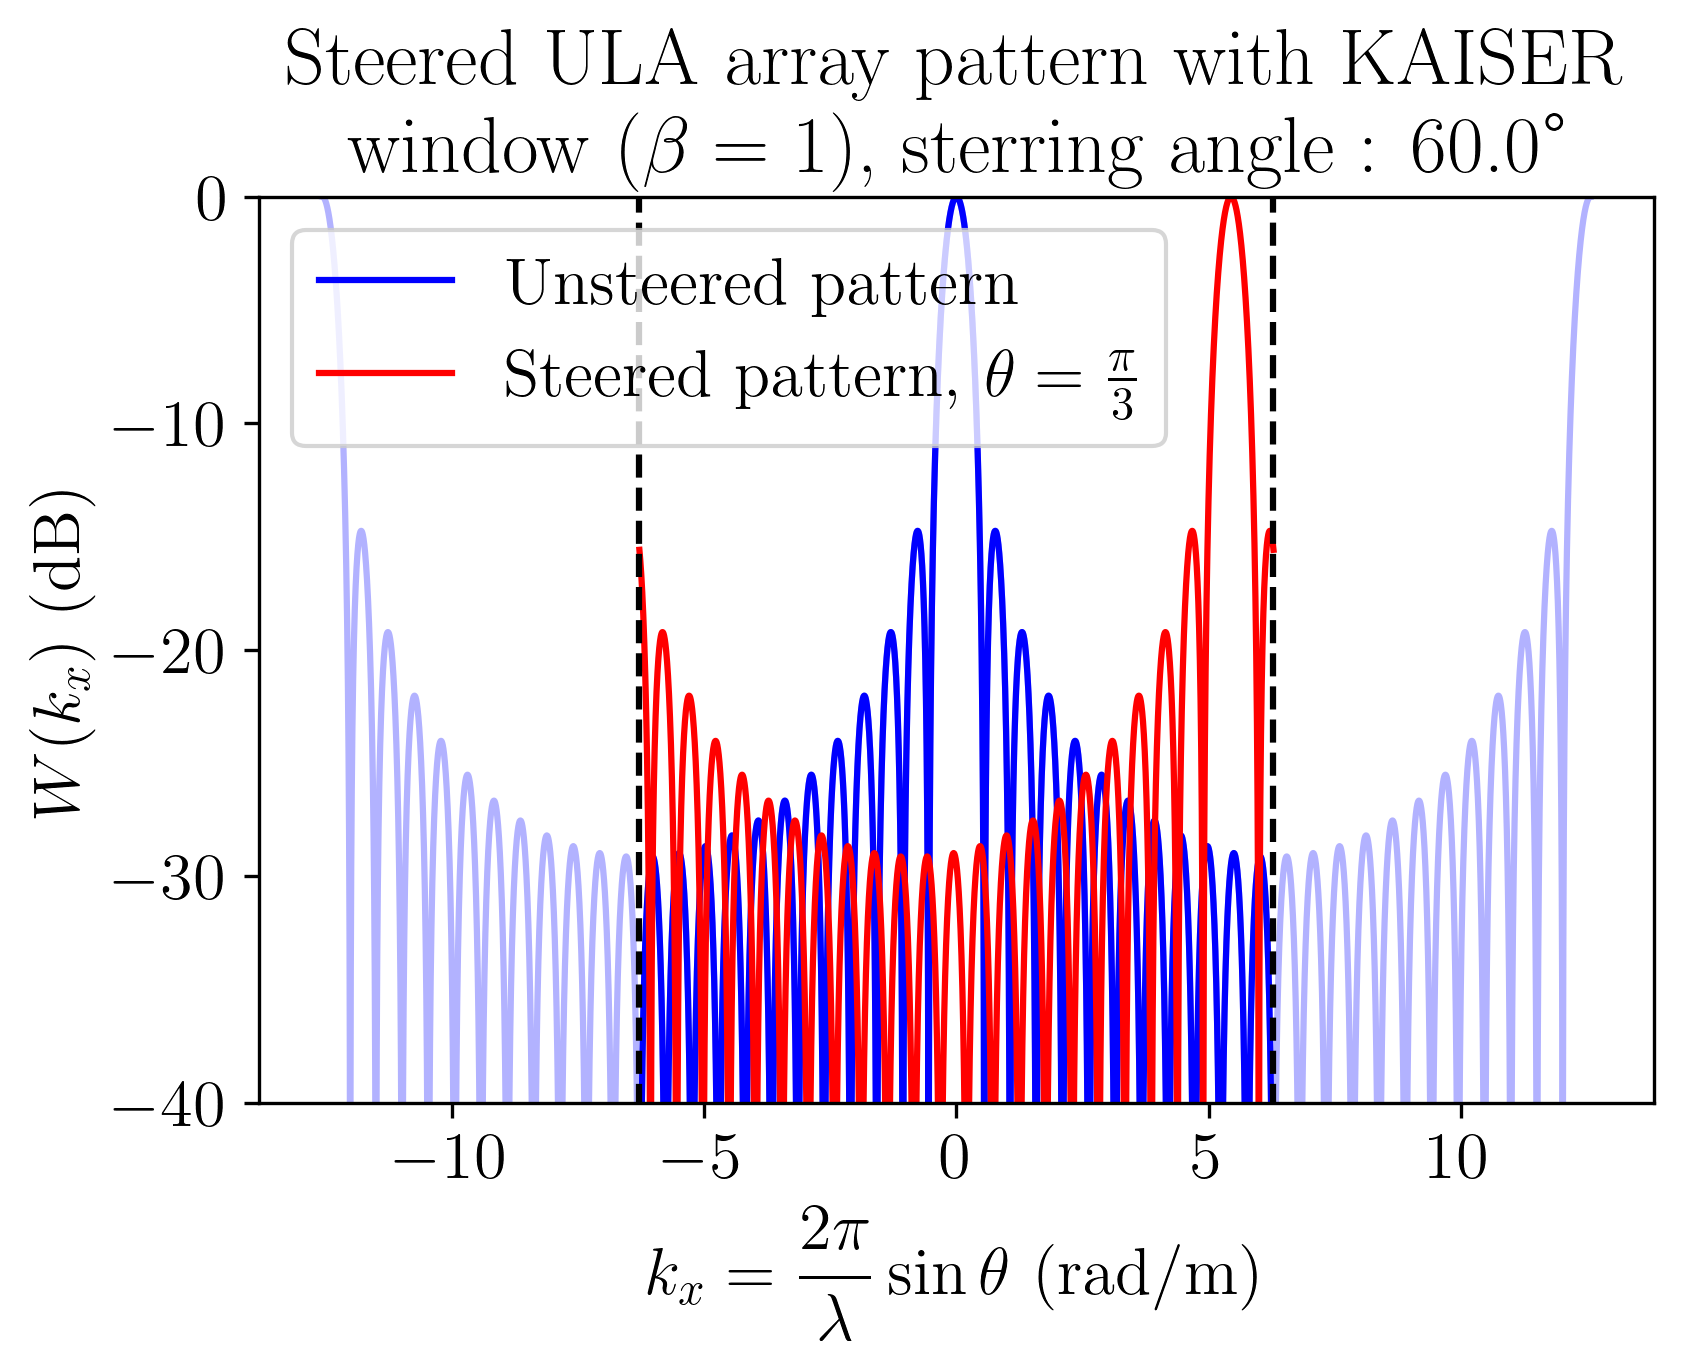

In [38]:
#Assume a linear array with M = 24 elements with unity weight. 
#Let the elements be uniformly spaced and try four different element spacings: d = λ/4, λ/2, λ, and 2λ. 
#Plot the results and discuss the differences as the inter-element distance varies.

# Number of elements
M=24
# Wavelength
lambda_ = 1#m
# Spacing
spacing = lambda_/2
# Elements positions vector
positions = np.arange(0,M,1)*spacing
# KAISER window
beta = 1
window = scipy.signal.windows.kaiser(M=24, beta=beta, sym=True)
# Weigths vector
weights = np.ones(M)*window
weights = weights/np.sum(weights)
# K values vector
k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_
# Array pattern 

# Steering angle : 30°

steering_angle = np.pi/3

extended_k_values = np.arange(-2,2+0.0001,0.0001)*2*np.pi/lambda_
pattern_extended = np.abs(array_pattern(positions,weights,extended_k_values))
pattern_extended = 20*np.log10(pattern_extended/np.max(pattern_extended))

k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_
steered_pattern = np.abs(array_pattern(positions,weights,k_values-np.sin(steering_angle)*2*np.pi/lambda_))
steered_pattern = 20*np.log10(steered_pattern/np.max(steered_pattern))


fig,ax1 = plt.subplots(1)

ax1.plot(extended_k_values,pattern_extended,color='blue',alpha=0.3)
ax1.plot(extended_k_values[np.abs(extended_k_values) < 2*np.pi/lambda_],pattern_extended[np.abs(extended_k_values) < 2*np.pi/lambda_],color='blue',label='Unsteered pattern')
ax1.plot(k_values,steered_pattern,color='red',label='Steered pattern, $\\theta=\\frac{\pi}{3}$')

ax1.set_xlabel('$k_x=\dfrac{2\pi}{\lambda}\sin\\theta$ (rad/m)',fontsize=16)
ax1.set_ylabel('$W(k_x)$ (dB)',fontsize=16)
ax1.set_title('ElPos array pattern',fontsize=16)
ax1.plot([-2*np.pi/lambda_,-2*np.pi/lambda_],[np.min(pattern_extended),np.max(pattern_extended)],linestyle='--',color='k')
ax1.plot([2*np.pi/lambda_,2*np.pi/lambda_],[np.min(pattern_extended),np.max(pattern_extended)],linestyle='--',color='k')
ax1.legend(loc='best')
ax1.set_ylim([-40,0])
ax1.set_title('Steered ULA array pattern with KAISER\n window ($\\beta = 1$), sterring angle : {:.1f}°'.format(steering_angle*180/np.pi))

plt.savefig('images/array/steered_ULA_kaiser_array_pattern.png',dpi=300)





<IPython.core.display.Javascript object>


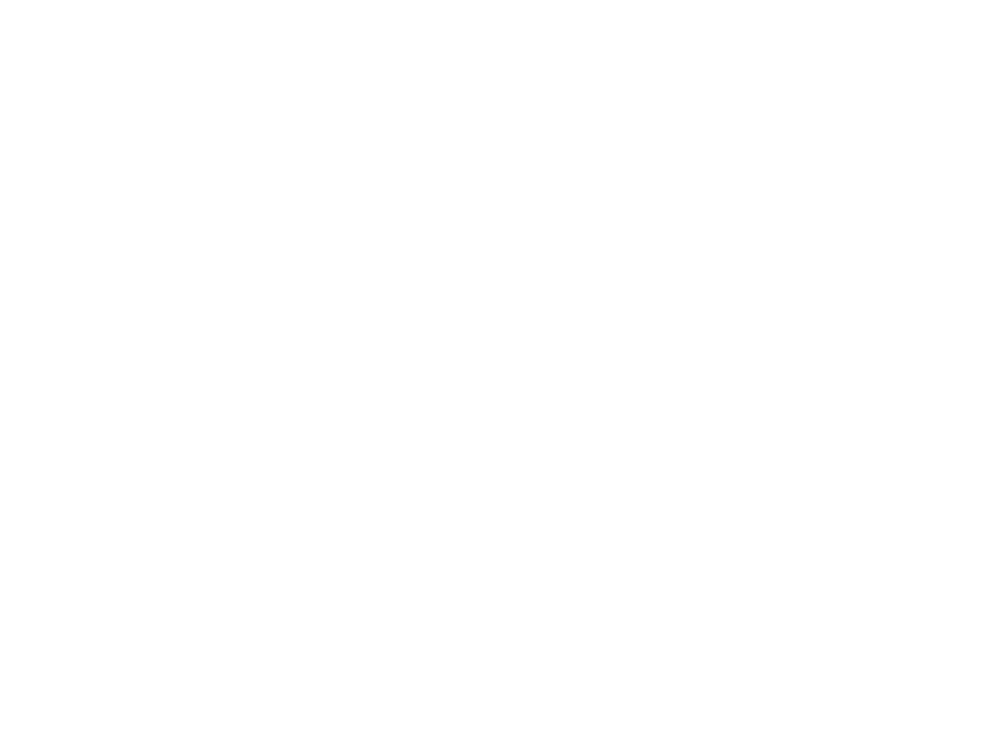

interactive(children=(FloatSlider(value=-0.0007963267948964958, description='steering_angle', max=1.5707963267…

In [39]:
%matplotlib notebook
from ipywidgets import *

# Steering angle : 60°

extended_k_values = np.arange(-2,2+0.0001,0.0001)*2*np.pi/lambda_
pattern_extended = np.log10(np.abs(array_pattern(ElPos,weights,extended_k_values))**2)

k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(extended_k_values,pattern_extended,color='blue',alpha=0.3)
ax.plot(extended_k_values[np.abs(extended_k_values) < 2*np.pi/lambda_],pattern_extended[np.abs(extended_k_values) < 2*np.pi/lambda_],color='blue')

ax.set_xlabel('$k_x=\dfrac{2\pi}{\lambda}\sin\\theta$ (rad/m)',fontsize=16)
ax.set_ylabel('$W(k_x)$ (dB)',fontsize=16)
ax.set_title('ElPos array pattern',fontsize=16)
ax.plot([-2*np.pi/lambda_,-2*np.pi/lambda_],[np.min(pattern_extended),np.max(pattern_extended)],linestyle='--',color='k')
ax.plot([2*np.pi/lambda_,2*np.pi/lambda_],[np.min(pattern_extended),np.max(pattern_extended)],linestyle='--',color='k')


line, = ax.plot(k_values,np.log10(np.abs(array_pattern(ElPos,weights,k_values))**2),color='red')

def update(steering_angle = (-np.pi/2,np.pi/2,0.01)):
    
    steered_pattern = np.log10(np.abs(array_pattern(ElPos,weights,k_values-np.sin(steering_angle)*2*np.pi/lambda_))**2)
    line.set_ydata(steered_pattern)
    fig.canvas.draw_idle()

interact(update);

<IPython.core.display.Javascript object>


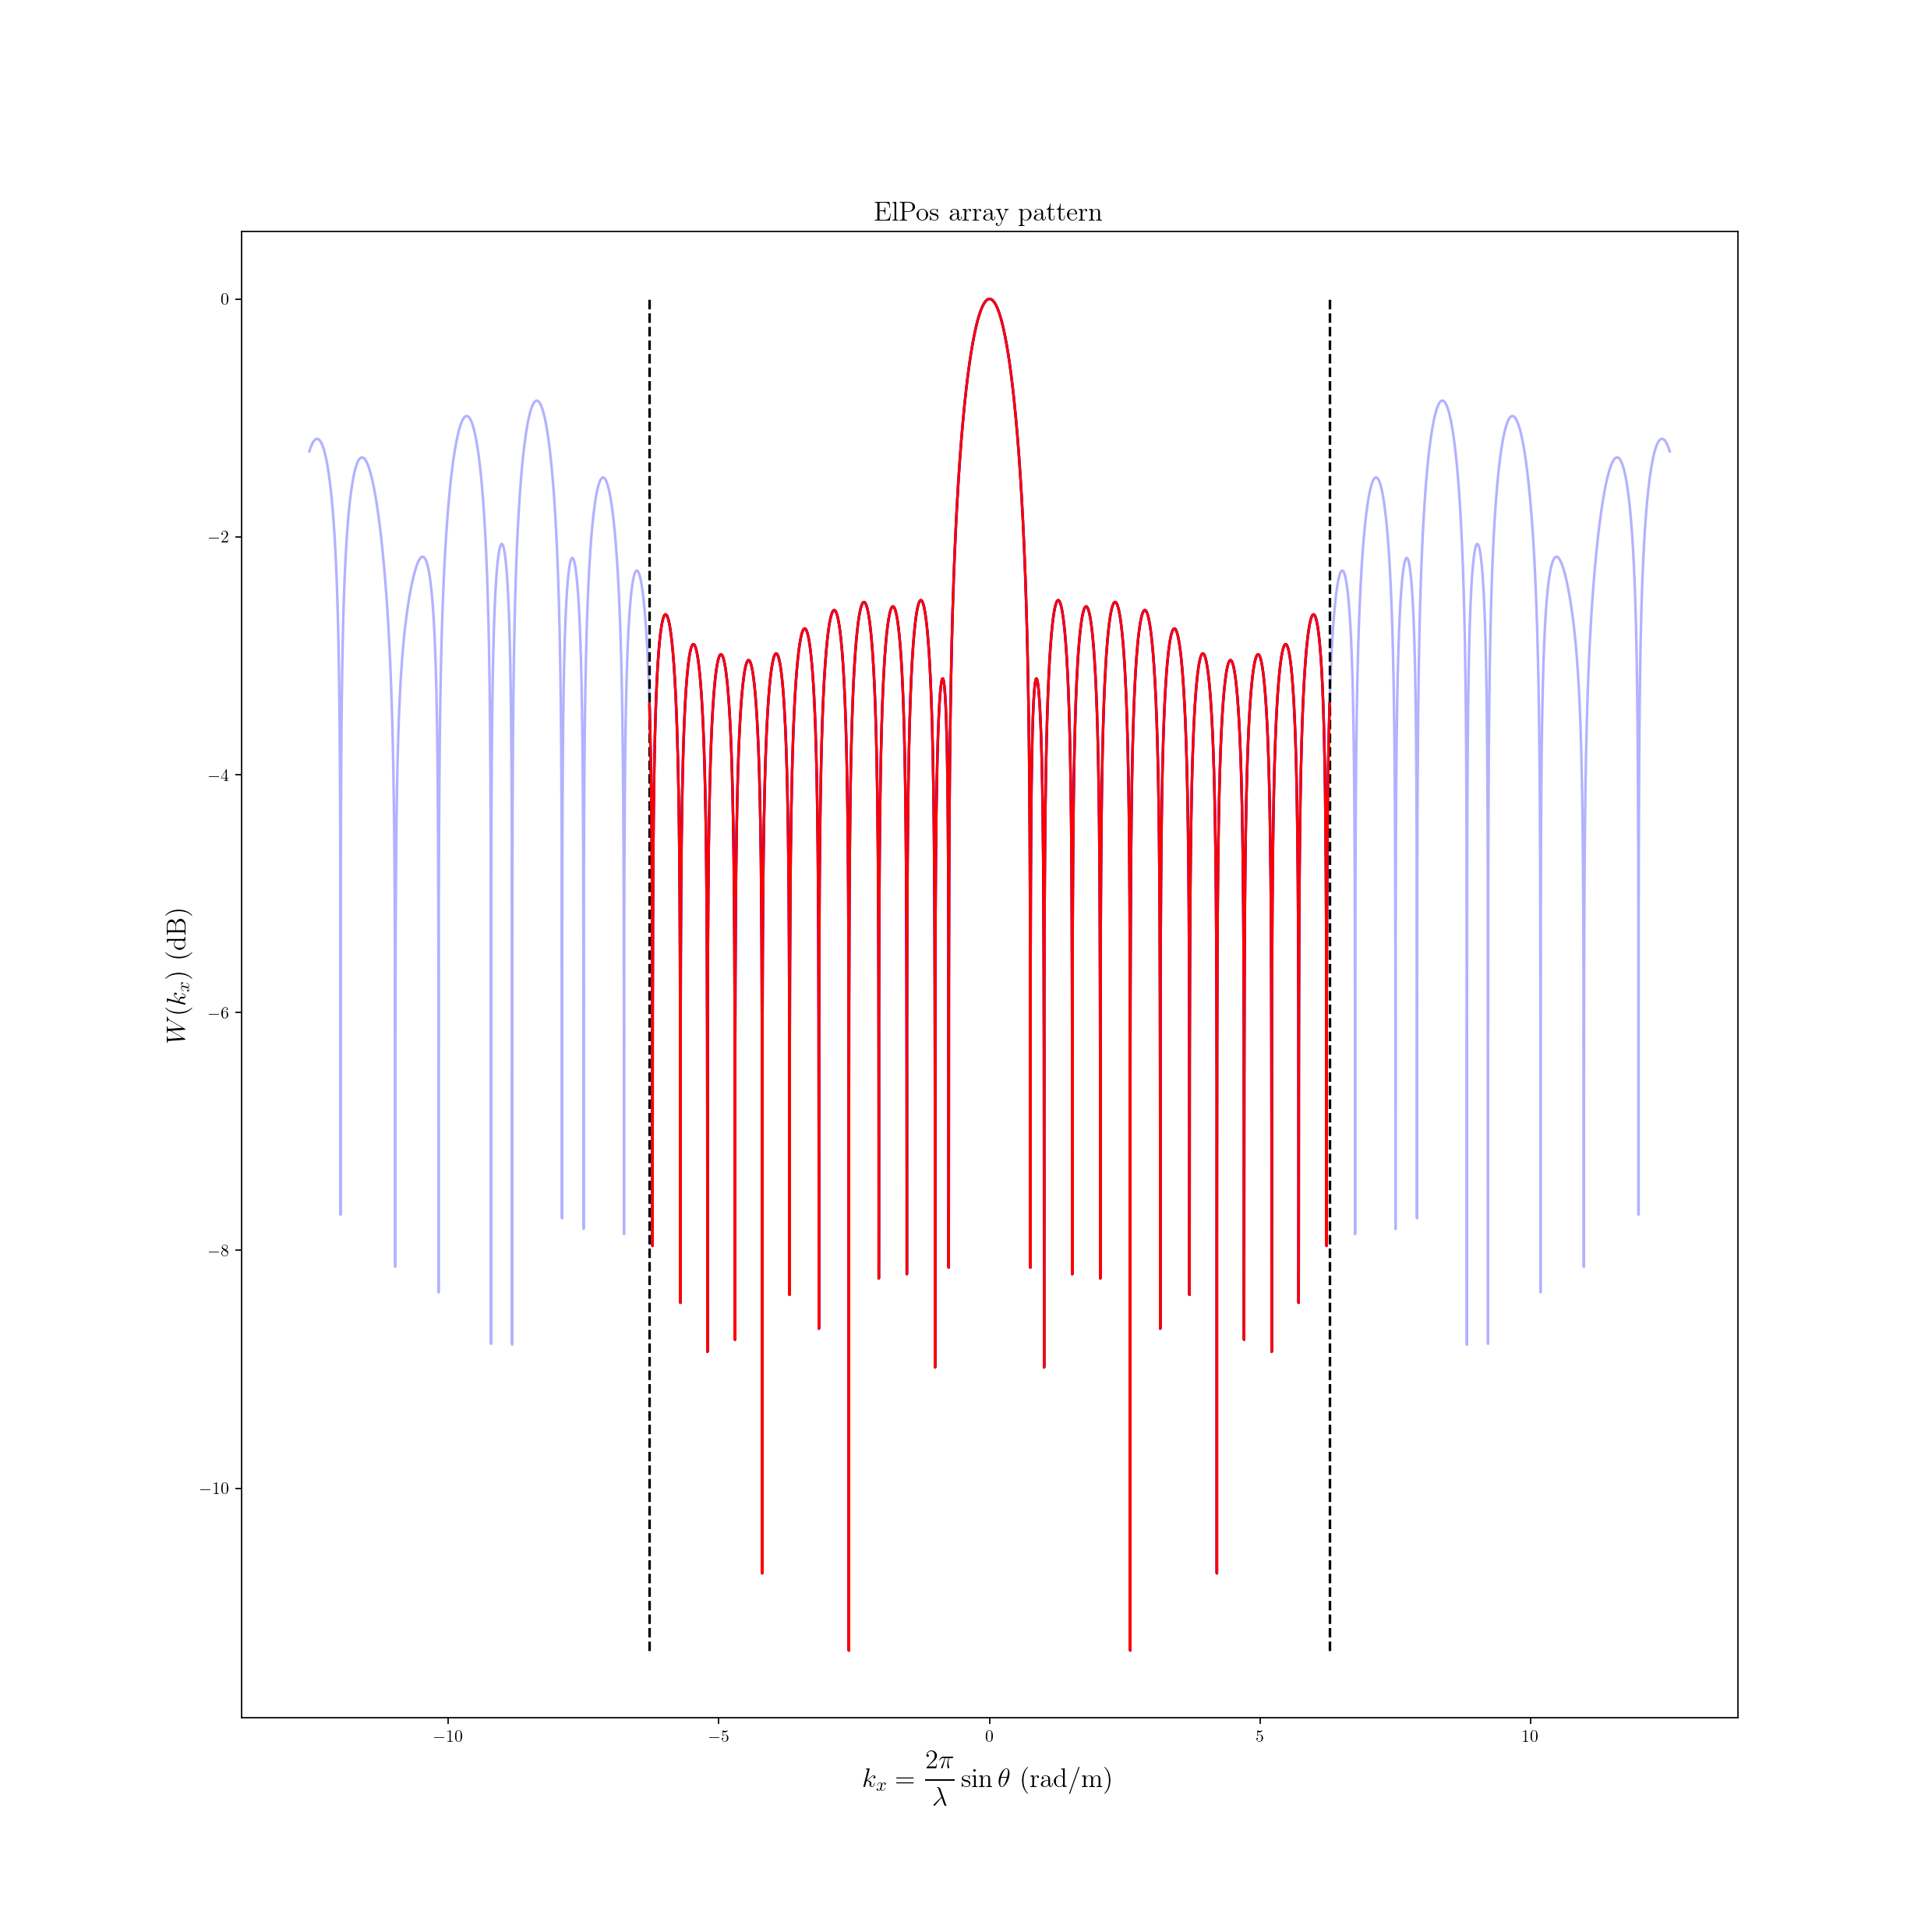

interactive(children=(FloatSlider(value=0.0, description='steering_angle', max=90.0, min=-90.0, step=0.01), Ou…

In [40]:
%matplotlib notebook
from ipywidgets import *


# Steering angle : 60°

extended_k_values = np.arange(-2,2+0.0001,0.0001)*2*np.pi/lambda_
pattern_extended = np.log10(np.abs(array_pattern(ElPos,weights,extended_k_values))**2)

k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(extended_k_values,pattern_extended,color='blue',alpha=0.3)
ax.plot(extended_k_values[np.abs(extended_k_values) < 2*np.pi/lambda_],pattern_extended[np.abs(extended_k_values) < 2*np.pi/lambda_],color='blue')

ax.set_xlabel('$k_x=\dfrac{2\pi}{\lambda}\sin\\theta$ (rad/m)',fontsize=16)
ax.set_ylabel('$W(k_x)$ (dB)',fontsize=16)
ax.set_title('ElPos array pattern',fontsize=16)
ax.plot([-2*np.pi/lambda_,-2*np.pi/lambda_],[np.min(pattern_extended),np.max(pattern_extended)],linestyle='--',color='k')
ax.plot([2*np.pi/lambda_,2*np.pi/lambda_],[np.min(pattern_extended),np.max(pattern_extended)],linestyle='--',color='k')


line, = ax.plot(k_values,np.log10(np.abs(array_pattern(ElPos,weights,k_values))**2),color='red')

def update(steering_angle = (-90,90,0.01)):
    
    steered_pattern = np.log10(np.abs(array_pattern(ElPos,weights,k_values-np.sin(steering_angle*np.pi/180)*2*np.pi/lambda_))**2)
    line.set_ydata(steered_pattern)
    fig.canvas.draw_idle()

interact(update);


## 8. 

Compute and report the −3 dB and −6 dB mainlobe widths as a function of steering angle for the array in 3). Report the width both as kx or sin(angle)), and angle. Comment on the result.

In [41]:
ML_3dB_widths_k = []
ML_6dB_widths_k = []
ML_3dB_widths_theta = []
ML_6dB_widths_theta = []

steering_angles = np.arange(0,np.pi/3,0.001)

for steering_angle in tqdm(steering_angles) : 
    
    pattern = np.log10(np.abs(array_pattern(ElPos,weights,k_values-np.sin(steering_angle)*2*np.pi/lambda_))**2)
    params = get_lobes_positions(pattern,k_values)
    ML_3dB_widths_k.append(params['ML 3 dB width'])
    ML_6dB_widths_k.append(params['ML 6 dB width'])
    params = get_lobes_positions(pattern,np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    ML_3dB_widths_theta.append(params['ML 3 dB width'])
    ML_6dB_widths_theta.append(params['ML 6 dB width'])

100%|██████████████████████████████████████████████████████████████████████████████| 1048/1048 [00:28<00:00, 36.47it/s]


<IPython.core.display.Javascript object>


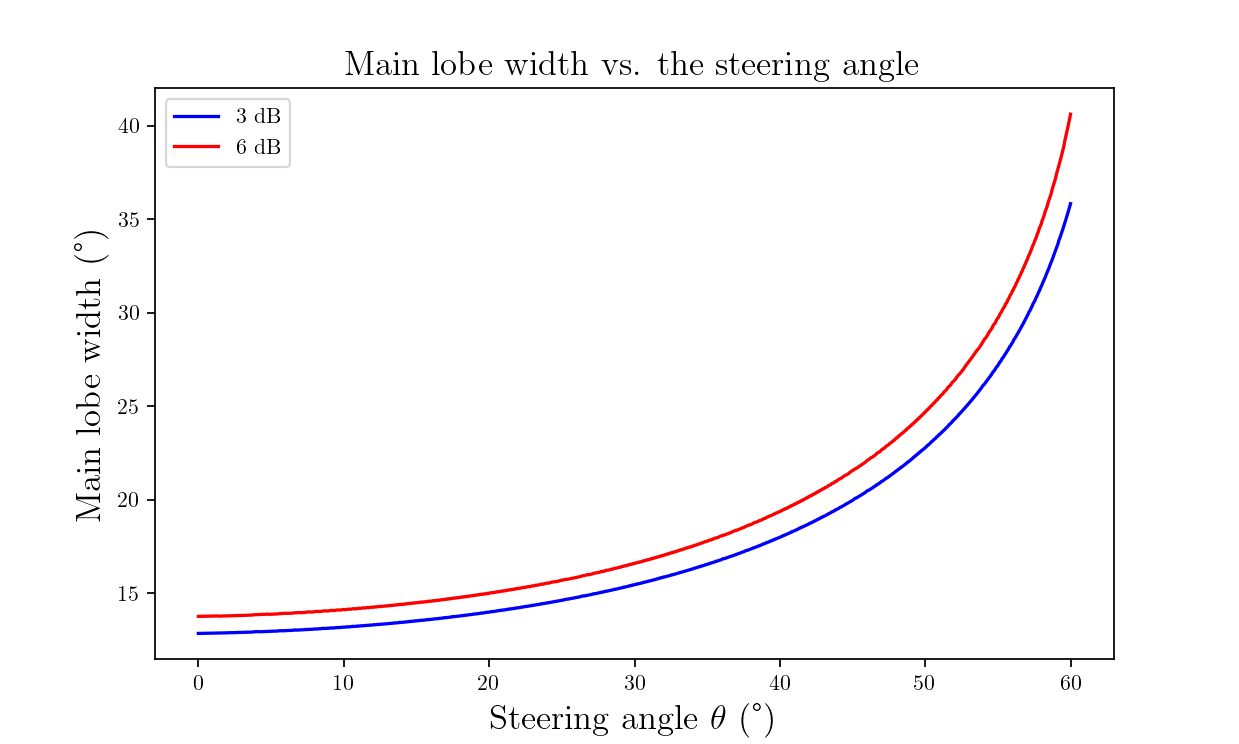

In [42]:
plt.figure(figsize=(5,3))
plt.title('Main lobe width vs. the steering angle',fontsize=16)
plt.plot(steering_angles*180/np.pi,ML_3dB_widths_theta,color='blue',label=' 3 dB')
plt.plot(steering_angles*180/np.pi,ML_6dB_widths_theta,color='red',label=' 6 dB')
plt.xlabel('Steering angle $\\theta$ (°)',fontsize=16)
plt.ylabel('Main lobe width (°)',fontsize=16)
plt.legend(loc='best')
plt.savefig('images/array/ml_widths_ElPos_theta.png',dpi=300)

<IPython.core.display.Javascript object>


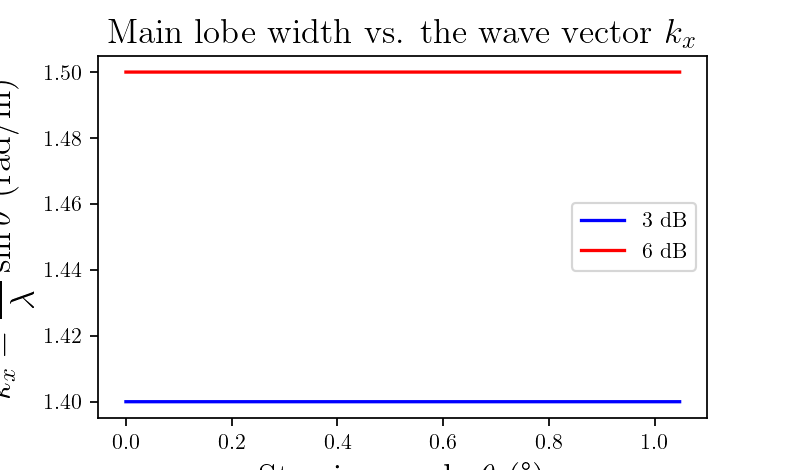

In [43]:
plt.figure(figsize=(5,3))
plt.title('Main lobe width vs. the wave vector $k_x$',fontsize=16)
plt.plot(steering_angles,np.round(ML_3dB_widths_k,1),color='blue',label=' 3 dB')
plt.plot(steering_angles,np.round(ML_6dB_widths_k,1),color='red',label=' 6 dB')
plt.ylabel('Main lobe width \n$k_x=\dfrac{2\pi}{\lambda}\sin\\theta$ (rad/m)',fontsize=16)
plt.xlabel('Steering angle $\\theta$ (°)',fontsize=16)
plt.legend(loc='best')
plt.savefig('images/array/ml_widths_ElPos_k.png',dpi=300)